<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.8.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
product = pd.read_csv('product_data.csv')
product.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
441,B07GY16KMK,Samsung,Samsung Galaxy S8 G950U 64GB - Prepaid Boost M...,https://www.amazon.com/Samsung-Galaxy-S8-G950U...,https://m.media-amazon.com/images/I/61Ldle1ceB...,3.2000000,https://www.amazon.com/product-reviews/B07GY16KMK,5,0.0000000,0.0000000
485,B07K4V3364,Samsung,Samsung Galaxy S6 G920 32GB Unlocked GSM 4G LT...,https://www.amazon.com/Samsung-Unlocked-Octa-C...,https://m.media-amazon.com/images/I/81Fr+G5Bcf...,3.4000000,https://www.amazon.com/product-reviews/B07K4V3364,184,0.0000000,0.0000000
122,B01BLSX96G,Samsung,Samsung Galaxy Grand Prime Prepaid Smartphone ...,https://www.amazon.com/Samsung-Prepaid-Smartph...,https://m.media-amazon.com/images/I/91yzn+6dfT...,3.3000000,https://www.amazon.com/product-reviews/B01BLSX96G,9,0.0000000,0.0000000
621,B07SRD34FJ,Samsung,Samsung Galaxy S10+ Plus Verizon + GSM Unlocke...,https://www.amazon.com/Samsung-Verizon-Unlocke...,https://m.media-amazon.com/images/I/31uRHaB2iv...,3.0000000,https://www.amazon.com/product-reviews/B07SRD34FJ,1,594.9800000,0.0000000
691,B07YBHNTSK,Google,"Google Pixel 3a XL Verizon Just Black, 64GB (R...",https://www.amazon.com/Google-Pixel-Verizon-Bl...,https://m.media-amazon.com/images/I/51C1LzmgNH...,5.0000000,https://www.amazon.com/product-reviews/B07YBHNTSK,1,344.9400000,0.0000000


In [5]:
product.shape

(720, 10)

In [6]:
reviews = pd.read_csv('reviews.csv')
reviews.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
23109,B01EIVMETG,David L.G. Crawford,5,"December 18, 2016",True,What a great phone,"This is an awesome little phone, at a great pr...",15.0000000
2736,B00836Y6B2,Abnellys Ochoa,5,"November 3, 2014",True,Five Stars,Loved it!,NaN
44128,B0787V183F,Justin E.,1,"December 18, 2019",True,Defective,Charging port is broken and won't take a full ...,NaN
15062,B00TRLXO6U,Amazon Customer,5,"February 20, 2016",True,Five Stars,Best ever,NaN
50834,B07GL4WGSF,Anthony Hartley,5,"October 23, 2018",True,Very,Needed a replacement,4.0000000


In [7]:
reviews.shape

(67986, 8)

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [8]:
product.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [9]:
product.drop(columns=['url', 'image', 'reviewUrl'], inplace=True)

In [10]:
product.sample(2)

,asin,brand,title,rating,totalReviews,price,originalPrice
218,B06XSF5C42,Samsung,Samsung Galaxy S7 Edge 32GB G935A GSM Unlocked...,3.5000000,301,214.9700000,0.0000000
506,B07MF3Y8Y5,Motorola,Motorola G6 (XT1925) 32GB GSM Unlocked Android...,4.1000000,73,100.9600000,107.9900000


### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [11]:
product.describe(include='all')

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,NaN,NaN,NaN,NaN
top,B0000SX2UC,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",NaN,NaN,NaN,NaN
freq,1,346,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [12]:
reviews.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,NaN,2983,2,41489,59811,NaN
top,B00F2SKPIM,Amazon Customer,NaN,"December 11, 2019",True,Five Stars,Good,NaN
freq,981,6507,NaN,234,61225,6043,303,NaN
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

In [114]:
# OBSERVATIONS:
    # count and unique of asin is equal. So every record is unique. 
    # four observations dont have brand value.
    # there are only 10 unique brands of phones
    # suprisingly the min price is zero for few mobiles.

    # We have asin column which is common in both the dataframes. Down the line we can use it for merging.
    

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

<AxesSubplot:title={'center':'Distribution of Rating'}>

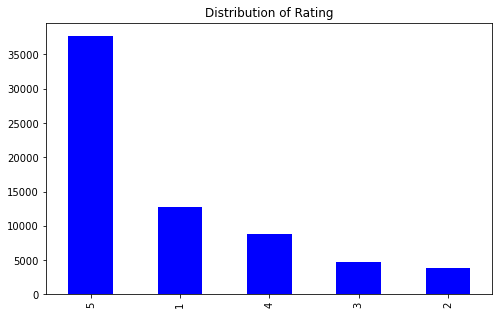

In [14]:
reviews['rating'].value_counts().plot(kind='bar', color='blue', figsize=(8,5), title = 'Distribution of Rating')

<AxesSubplot:title={'center':'Distribution of Brand share in the Market'}>

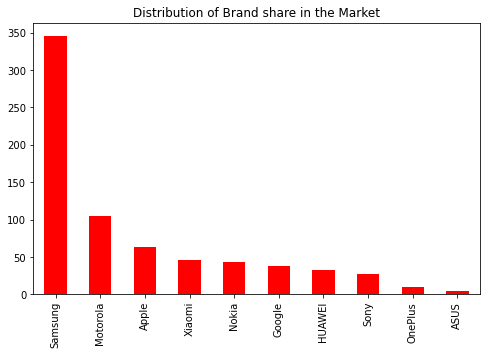

In [15]:
product['brand'].value_counts().plot(kind='bar', color='red', figsize=(8,5), title = 'Distribution of Brand share in the Market')

<AxesSubplot:title={'center':'Distribution of Brand share in the Market'}, ylabel='brand'>

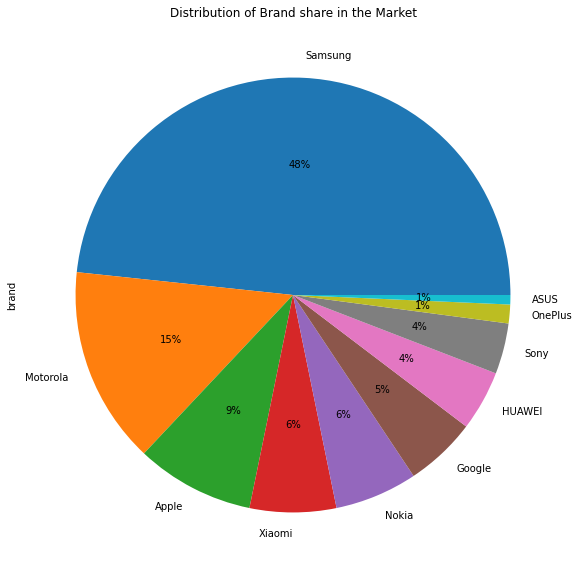

In [16]:
product['brand'].value_counts().plot(kind='pie',autopct='%1.0f%%',  figsize=(10,10), title = 'Distribution of Brand share in the Market')

### 4.5 Display average rating per brand

<AxesSubplot:xlabel='brand'>

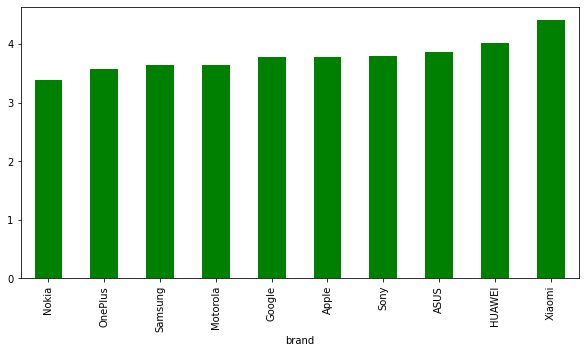

In [18]:
product.groupby('brand').mean().rating.sort_values().plot(kind='bar', color='green',figsize=(10,5))

### 4.6 Display average price per brand

<AxesSubplot:xlabel='brand'>

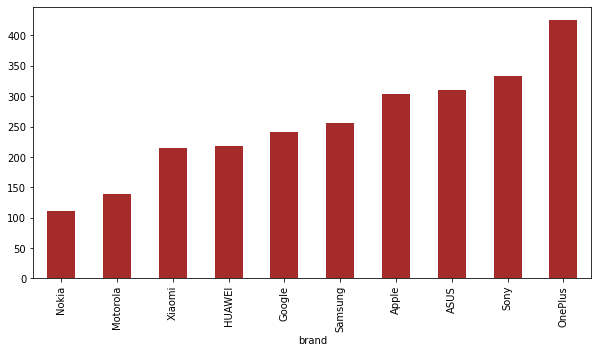

In [19]:
product.groupby('brand').mean().price.sort_values().plot(kind='bar', color='brown',figsize=(10,5))

### 4.7 Display average 'totalReviews' per brand

<AxesSubplot:xlabel='brand'>

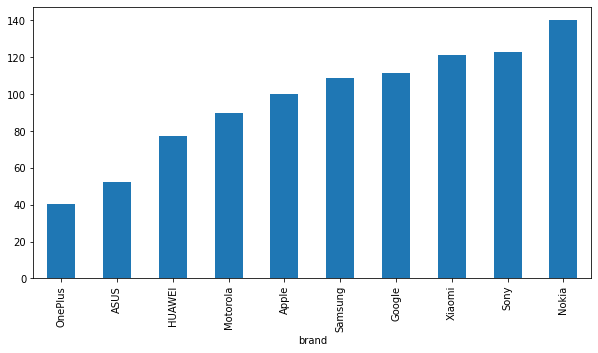

In [20]:
product.groupby('brand').mean().totalReviews.sort_values().plot(kind='bar', figsize=(10,5))

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [21]:
main_df = pd.merge(reviews,product , how='inner', on='asin') 
main_df.shape

(67986, 14)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [22]:
main_df.columns

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'title_x', 'body',
       'helpfulVotes', 'brand', 'title_y', 'rating_y', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

In [23]:
main_df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
main_df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [24]:
verified_reviews = main_df[main_df.verified==True]
verified_reviews.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [25]:
verified_reviews['brand'].value_counts()

Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: brand, dtype: int64

In [26]:
verified_reviews.groupby('brand').sum().verified.sort_values(ascending=False)

brand
Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: verified, dtype: int64

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [27]:
verified_reviews = verified_reviews[['brand','body','price','user_rating','review_title']]
verified_reviews.head(2)

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

<AxesSubplot:xlabel='price', ylabel='Density'>

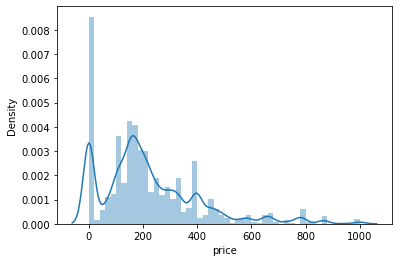

In [35]:
sns.distplot(verified_reviews['price'] )

<AxesSubplot:>

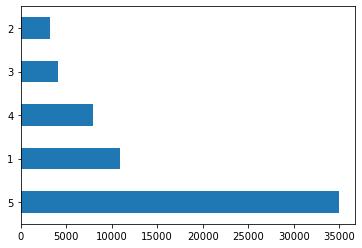

In [31]:
verified_reviews['user_rating'].value_counts().plot(kind='barh')

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [37]:
verified_reviews['sentiment'] = verified_reviews['user_rating'].apply(lambda x :1 if x>3 else (0 if x==3 else -1))

In [38]:
verified_reviews.sample(5)

,brand,body,price,user_rating,review_title,sentiment
18151,Samsung,I bought this phone for my mom about a year ag...,148.9800000,3,It's okay!,0
20272,HUAWEI,My phone is at the same 1.5 year mark as every...,0.0000000,1,Decent Phone With Crippling Foundational Flaw ...,-1
7919,Samsung,"Quick delivery, everything as advertise. Extre...",229.9900000,5,Extremely satisfied. Samsung S4 is a very very...,1
55309,OnePlus,Good,599.9900000,5,👌,1
51258,Xiaomi,Want to buy another one,314.5000000,5,Love it,1


### 4.15 Check frequency distribution of the 'sentiment'

<AxesSubplot:>

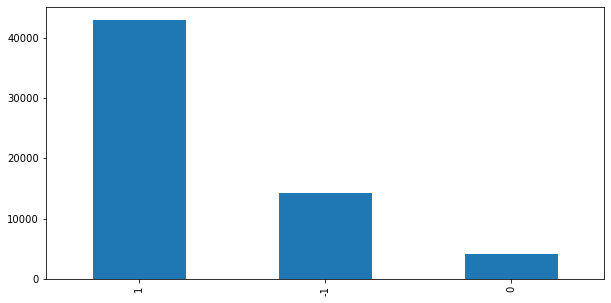

In [40]:
verified_reviews.sentiment.value_counts().plot(kind="bar", figsize=(10,5))

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [41]:
verified_reviews.corr()

,price,user_rating,sentiment
price,1.0000000,0.0549462,0.0466878
user_rating,0.0549462,1.0000000,0.9694496
sentiment,0.0466878,0.9694496,1.0000000


In [ ]:
# As we derived sentiment from user_rating, there is a high positive corelation between them.

<AxesSubplot:xlabel='brand'>

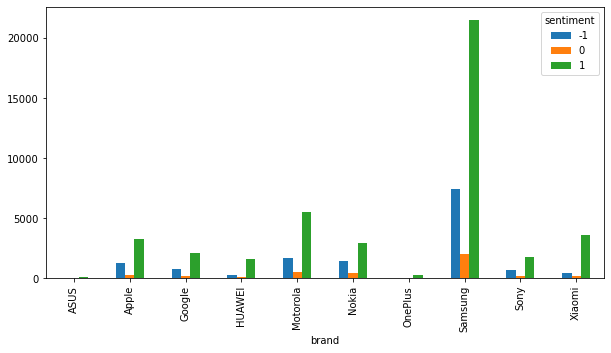

In [46]:
pd.crosstab(verified_reviews['brand'], verified_reviews['sentiment']).plot(kind='bar', figsize=(10,5))

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [48]:
verified_reviews['body'] = verified_reviews['body'].astype('str')

In [63]:
verified_reviews['body2'] = verified_reviews['body'].apply(lambda x:x.lower())
verified_reviews.sample(2)

,brand,body,price,user_rating,review_title,sentiment,body2
18693,Samsung,nice phone,148.9800000,5,nice phone,1,nice phone
2112,Samsung,After reading 22 reviews on this phone that ga...,97.6900000,5,Samsung a157 Prepaid GoPhone (AT&T),1,after reading 22 reviews on this phone that ga...


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [64]:
verified_reviews['body2'] = verified_reviews['body2'].str.replace('[^\w\s]','')
verified_reviews.sample(2)

,brand,body,price,user_rating,review_title,sentiment,body2
41125,Samsung,Tiene una falla en la pantalla casa no e nota ...,330.9500000,4,Prácticamente 9/10,1,tiene una falla en la pantalla casa no e nota ...
21698,Samsung,Mediocre at best. Design is not very attractiv...,248.7000000,2,Mediocre at best. Design is not very attractiv...,-1,mediocre at best design is not very attractive...


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [65]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dolla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
stop = set(stopwords.words('english'))
len(stop)

179

In [67]:
verified_reviews['body2'] = verified_reviews['body2'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop))
verified_reviews.sample(2)

,brand,body,price,user_rating,review_title,sentiment,body2
32265,Samsung,Great phone easy to use.,179.9900000,5,Being able to talk to the phone.,1,great phone easy use
67953,Sony,Quility,948.0000000,5,Great,1,quility


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [74]:
nltk.download('wordnet')

from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)])
    return ' '.join(words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dolla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
verified_reviews['lemm'] = verified_reviews['body2'].apply(lemmatize_text)
verified_reviews.sample(10)

,brand,body,price,user_rating,review_title,sentiment,body2,lemm
48683,Apple,Very clean. and easy to setup,476.0000000,5,Like New,1,clean easy setup,clean easy setup
33139,Samsung,Long battery life and durable,255.9900000,5,Long battery life and durable,1,long battery life durable,long battery life durable
54680,Google,Battery life was not as expected or described ...,464.0000000,1,Black screen horrible battery,-1,battery life expected described google website...,battery life expected described google website...
1778,Samsung,"It is perfectly functional, has good audio cla...",0.0000000,4,has good audio clarity and volume,1,perfectly functional good audio clarity volume...,perfectly functional good audio clarity volume...
49525,Xiaomi,Best cheap phone u can get. Delivery fast 7 da...,159.4900000,5,Mi a2 best phone ever,1,best cheap phone u get delivery fast 7 days so...,best cheap phone u get delivery fast 7 day sou...
57324,Motorola,"Excellent phone in the ""budget"" catagory. Can'...",153.9900000,5,"Great ""budget"" friendly smart phone!",1,excellent phone budget catagory cant really sa...,excellent phone budget catagory cant really sa...
25037,Apple,Good phone loved the color so excited awesome ...,198.9000000,5,Loved it,1,good phone loved color excited awesome price,good phone loved color excited awesome price
23294,Samsung,"I'm loving this phone, so much got 2 more, one...",139.9700000,4,Good phone for those that don't need alot of aps.,1,im loving phone much got 2 one wife daughter i...,im loving phone much got 2 one wife daughter i...
3956,Motorola,No complaints! It was delivered fast and easy ...,99.9900000,5,Good purchase,1,complaints delivered fast easy set got husband...,complaint delivered fast easy set got husband ...
36771,Samsung,Product isnt new and is asking me for a code t...,128.7900000,1,Product isnt new and is asking me for a code ...,-1,product isnt new asking code dont pretective s...,product isnt new asking code dont pretective s...


In [76]:
sen = 'learnings compound overtime'
print(lemmatize_text(sen))

learning compound overtime


### 5.5 Write a function to check word frequency of the text

In [84]:
def word_count(str):
    counts = dict()
    words =str.split()

    for word in words:
        if word in counts:
            counts[word] +=1
        else:
            counts[word] = 1

    return counts

In [85]:
word_freq = verified_reviews['lemm'].apply(word_count)

In [86]:
word_freq.head(5)

14                  {'dont': 1, 'buy': 1, 'service': 1}
17    {'1': 1, 'star': 1, 'phone': 1, 'locked': 1, '...
18    {'product': 1, 'good': 1, 'used': 1, 'cell': 1...
21    {'bought': 1, 'phone': 4, 'replace': 1, 'lg': ...
22    {'purchased': 1, 'phone': 4, 'att': 2, 'replac...
Name: lemm, dtype: object

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [91]:
senti_1 = verified_reviews[verified_reviews['sentiment']==1]
word_freq_senti_1 = senti_1['lemm'].apply(word_count)
word_freq_senti_1.sample(6)

55051    {'kind': 1, 'annoying': 1, 'try': 1, 'randomly...
18813    {'phone': 1, 'work': 1, 'verywell': 1, 'appear...
12376    {'item': 1, 'arrived': 1, 'described': 1, 'goo...
35657    {'great': 2, 'phone': 1, 'camera': 1, 'fast': ...
9852     {'smartphone': 1, 'fantastic': 1, 'youre': 1, ...
36969    {'good': 1, '1st': 1, 'generation': 1, 'alread...
Name: lemm, dtype: object

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

In [95]:
tfidf_reviews = tfidf_vect.fit_transform(verified_reviews['lemm'])
tfidf_reviews

<61225x36034 sparse matrix of type '<class 'numpy.float64'>'
	with 1171996 stored elements in Compressed Sparse Row format>

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [96]:
y1 = verified_reviews['sentiment'] # RF
y2 = verified_reviews['user_rating'] #XGB

### 5.9 Split the data into Train & Test Sets

In [109]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test =train_test_split(tfidf_reviews,y1, random_state=1, stratify=y1, test_size=0.3 )
x2_train, x2_test, y2_train, y2_test =train_test_split(tfidf_reviews,y2, random_state=1, stratify=y2, test_size=0.3 )

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfclf1 = RandomForestClassifier(max_depth=100)
rfclf1.fit(x1_train, y1_train)
print(rfclf1.score(x1_train, y1_train))
print(rfclf1.score(x1_test, y1_test))

0.9209930699768999
0.8191419860627178


In [110]:
y2_train = y2_train - 1
y2_test = y2_test - 1


In [111]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x2_train, y2_train)
print(xgb.score(x2_train, y2_train))
print(xgb.score(x2_test, y2_test))

0.7857526191753973
0.6986062717770035


In [105]:
from sklearn.metrics import confusion_matrix
y1_pred = rfclf1.predict(x1_test)
confusion_matrix(y1_test, y1_pred)

array([[ 2290,     0,  1958],
       [  208,    37,   993],
       [  163,     0, 12719]], dtype=int64)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

          -1       0.86      0.54      0.66      4248
           0       1.00      0.03      0.06      1238
           1       0.81      0.99      0.89     12882

    accuracy                           0.82     18368
   macro avg       0.89      0.52      0.54     18368
weighted avg       0.84      0.82      0.78     18368



In [112]:
y2_pred = xgb.predict(x2_test)
confusion_matrix(y2_test, y2_pred)

array([[ 2343,    46,    36,    50,   798],
       [  480,    49,    45,    49,   351],
       [  343,    23,    88,   144,   640],
       [  152,    13,    39,   268,  1910],
       [  224,    20,    22,   151, 10084]], dtype=int64)

In [113]:
print(classification_report(y2_test, y2_pred))


              precision    recall  f1-score   support

           0       0.66      0.72      0.69      3273
           1       0.32      0.05      0.09       974
           2       0.38      0.07      0.12      1238
           3       0.40      0.11      0.18      2382
           4       0.73      0.96      0.83     10501

    accuracy                           0.70     18368
   macro avg       0.50      0.38      0.38     18368
weighted avg       0.63      0.70      0.63     18368



## 7. Write your conclusion

#### The final data is too much biased for the 5 rating, so we had very good true positives and very less misclassified. 

#### In random forest, 37 of zero classes were classified correcty. as there is very less data for that class.